# AVL Tree Implementation

## Algorithm/Data Structure

For this project, I selected the **Binary Search Tree (BST)**, a foundational data structure studied in class. A BST organizes elements hierarchically, enabling efficient search, insertion, and deletion operations—ideally with an average-case time complexity of **O(log n)** when balanced. However, a classic BST does **not self-balance**, and under skewed insertions (e.g., inserting sorted values), the structure degrades into a linear chain with **O(n)** time complexity.

---

## Identified Drawback and Implementation

The implementation detail I explored, which was not covered in class, is the **self-balancing mechanism of an AVL Tree**. An **AVL Tree** is a self-balancing BST that maintains a balance factor (height difference between left and right subtrees) of -1, 0, or +1 at every node. When this balance factor goes out of range due to insertion or deletion, AVL trees automatically perform **rotations** to rebalance themselves.

This balancing ensures **O(log n)** time complexity for search, insertion, and deletion, regardless of the input sequence. The implementation addresses the core limitation of standard BSTs by integrating four types of rotations: **Left-Left (LL), Right-Right (RR), Left-Right (LR), and Right-Left (RL)**.

---

## Implementation

The code is implemented in **Python** with the following key components:

### `AVLNode` Class

Defines each node in the tree with:

- `key`: the node's value.
- `left`, `right`: pointers to child nodes.
- `height`: used for balance checking.

### `AVLTree` Class

Handles the tree logic, including insertion, height updating, and rebalancing.

#### Helper Methods

- `get_height(node)`: Returns the height of a node or 0 if `None`.
- `get_balance(node)`: Computes the balance factor as `height(left) - height(right)`.
- `update_height(node)`: Updates the node height based on child heights.
- `right_rotate(z)` / `left_rotate(z)`: Performs necessary AVL rotations.
- `inorder_traversal(node)`: Returns a sorted list of keys in the tree (used for correctness checks).
- `visualize_tree(node)`: Draws the AVL tree using `networkx` and `matplotlib`.

#### `insert(root, key)`

- Performs BST insertion recursively.
- Updates node heights and balance factors.
- Detects imbalances and applies the corresponding rotation (LL, RR, LR, RL).
- Returns the updated root after rebalancing.

---

## Unit Tests and Drawback Resolution

Unit testing is done using Python's `unittest` framework to validate correctness and balancing.

### Test Case: Mixed Insertions

- Inserts the values  
  `[10, 20, 30, 40, 50, 25, 5, 4, 3, 35, 45, 60, 55, 70]`,  
  which include ascending, descending, and mixed values, simulating realistic and worst-case scenarios for BSTs.

- **Height Check**: The tree's height remains logarithmic (≤ 5 for 14 nodes), confirming balancing.
- **Correctness Check**: The `inorder_traversal()` returns a sorted list:
[3, 4, 5, 10, 20, 25, 30, 35, 40, 45, 50, 55, 60, 70]

proving that the AVL tree maintains the **BST invariant** after all rotations and rebalancing operations.

These tests validate that the AVL Tree handles diverse inputs while maintaining structure and performance guarantees.

---

## Visualization

After inserting the complete set of elements, the AVL Tree is visualized using `matplotlib` and `networkx`. The diagram shows:

- Hierarchical structure post-rotations.
- Even distribution of nodes on both sides of the root.
- Self-balancing behavior keeping the tree shallow.

This visualization offers intuitive confirmation of correctness and balance, and helps debug the internal logic of tree transformations.

---
---

## Define the Node class

In [1]:
class AVLNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1  # Initial height for a new node

## Define the AVLTree class skeleton

In [12]:
class AVLTree:
    # Helper method to get the height of a node
    def get_height(self, node):
        if not node:
            return 0
        return node.height

    # Helper method to get the balance factor
    def get_balance(self, node):
        if not node:
            return 0
        return self.get_height(node.left) - self.get_height(node.right)

    # Right rotate utility
    def right_rotate(self, z):
        y = z.left
        T3 = y.right

        # Perform rotation
        y.right = z
        z.left = T3

        # Update heights
        z.height = 1 + max(self.get_height(z.left), self.get_height(z.right))
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))

        return y

    # Left rotate utility
    def left_rotate(self, z):
        y = z.right
        T2 = y.left

        # Perform rotation
        y.left = z
        z.right = T2

        # Update heights
        z.height = 1 + max(self.get_height(z.left), self.get_height(z.right))
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))

        return y

## Insert Method with Balancing Logic

In [13]:
# Insertion method with balancing
def insert(self, node, key):
    # Perform normal BST insertion
    if not node:
        return AVLNode(key)
    elif key < node.key:
        node.left = self.insert(node.left, key)
    elif key > node.key:
        node.right = self.insert(node.right, key)
    else:
        return node  # Duplicate keys not allowed

    # Update height of ancestor node
    node.height = 1 + max(self.get_height(node.left), self.get_height(node.right))

    # Get balance factor
    balance = self.get_balance(node)

    # If unbalanced, perform rotations

    # Left Left
    if balance > 1 and key < node.left.key:
        return self.right_rotate(node)

    # Right Right
    if balance < -1 and key > node.right.key:
        return self.left_rotate(node)

    # Left Right
    if balance > 1 and key > node.left.key:
        node.left = self.left_rotate(node.left)
        return self.right_rotate(node)

    # Right Left
    if balance < -1 and key < node.right.key:
        node.right = self.right_rotate(node.right)
        return self.left_rotate(node)

    return node

## In-Order Traversal for Testing

In [18]:
# Inorder traversal
def inorder_traversal(self, root):
    result = []
    if root:
        result += self.inorder_traversal(root.left)
        result.append(root.key)
        result += self.inorder_traversal(root.right)
    return result


## AVL Rotations

To keep the AVL Tree balanced, the following rotations are used:

- **Left-Left (LL)**: Single right rotation
- **Right-Right (RR)**: Single left rotation
- **Left-Right (LR)**: First left rotation on left child, then right rotation
- **Right-Left (RL)**: First right rotation on right child, then left rotation

### Why Balance Matters
Without rebalancing, a BST can degrade into a linked list with O(n) time complexity for operations. AVL rotations restore balance and ensure O(log n) performance.


## Test It

In [9]:
# Instantiate the AVL Tree and test insertions
tree = AVLTree()
root = None
elements = [10, 20, 30, 40, 50, 25, 5, 4, 3, 35, 45, 60, 55, 70]

for el in elements:
    root = tree.insert(root, el)

print("Inorder traversal of constructed AVL tree:")
print(tree.inorder_traversal(root))


Inorder traversal of constructed AVL tree:
[3, 4, 5, 10, 20, 25, 30, 35, 40, 45, 50, 55, 60, 70]


## Unit Test Implementation

In [10]:
import unittest

class TestAVLTree(unittest.TestCase):
    def setUp(self):
        self.tree = AVLTree()
        self.root = None

    def test_inorder_traversal(self):
        elements = [10, 20, 30, 40, 50, 25, 5, 4, 3, 35, 45, 60, 55, 70]
        for el in elements:
            self.root = self.tree.insert(self.root, el)
        traversal = self.tree.inorder_traversal(self.root)
        self.assertEqual(traversal, sorted(elements), "Inorder traversal should return sorted elements.")

    def test_balance_factors(self):
        elements = [10, 20, 30, 40, 50, 25, 5, 4, 3, 35, 45, 60, 55, 70]
        for el in elements:
            self.root = self.tree.insert(self.root, el)

        def check_balances(node):
            if not node:
                return True
            balance = self.tree.get_balance(node)
            self.assertTrue(-1 <= balance <= 1, f"Node {node.key} unbalanced with factor {balance}")
            return check_balances(node.left) and check_balances(node.right)

        self.assertTrue(check_balances(self.root))

    def test_height_logarithmic(self):
        # Insert sorted elements which would normally unbalance a BST
        sorted_elements = list(range(1, 100))
        for el in sorted_elements:
            self.root = self.tree.insert(self.root, el)
        height = self.tree.get_height(self.root)
        # Height of AVL Tree should be ~ log2(n), allow a small buffer
        import math
        expected_max_height = 1.44 * math.log2(len(sorted_elements) + 1)
        self.assertLessEqual(height, expected_max_height,
                             f"Height {height} exceeds expected log-scale {expected_max_height}")

if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)


...
----------------------------------------------------------------------
Ran 3 tests in 0.030s

OK


## AVL Tree Visualization

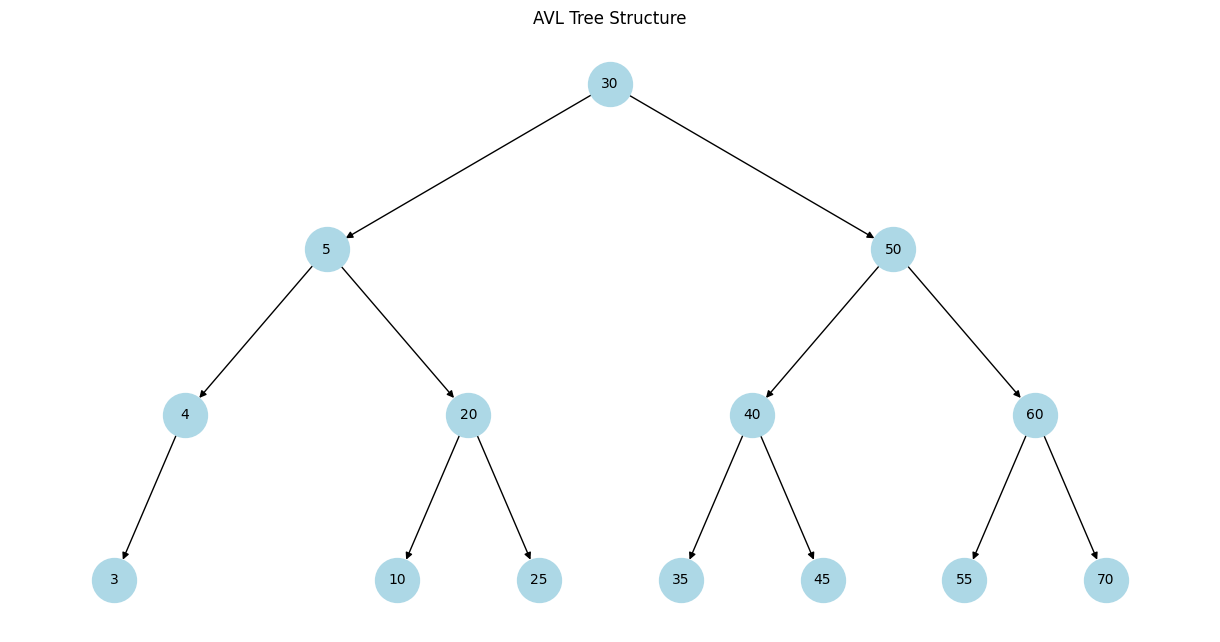

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

class AVLVisualizer:
    def __init__(self, tree):
        self.tree = tree
        self.graph = nx.DiGraph()
        self.positions = {}
        self.levels = {}

    def add_edges(self, node, x=0, y=0, level=1):
        if node is None:
            return
        self.graph.add_node(node.key)
        self.positions[node.key] = (x, -y)
        self.levels.setdefault(level, []).append(node.key)
        offset = 1 / (2 ** level)

        if node.left:
            self.graph.add_edge(node.key, node.left.key)
            self.add_edges(node.left, x - offset, y + 1, level + 1)

        if node.right:
            self.graph.add_edge(node.key, node.right.key)
            self.add_edges(node.right, x + offset, y + 1, level + 1)

    def draw(self):
        plt.figure(figsize=(12, 6))
        nx.draw(self.graph, pos=self.positions, with_labels=True, node_size=1000, node_color="lightblue", font_size=10)
        plt.title("AVL Tree Structure")
        plt.show()


# Usage
tree = AVLTree()
root = None
elements = [10, 20, 30, 40, 50, 25, 5, 4, 3, 35, 45, 60, 55, 70]
for el in elements:
    root = tree.insert(root, el)

visualizer = AVLVisualizer(tree)
visualizer.add_edges(root)
visualizer.draw()


## Conclusion
This project implemented the AVL Tree, a self-balancing variant of the Binary Search Tree (BST), to address the performance issues caused by tree imbalance in standard BSTs. While a traditional BST can degrade to O(n) performance with skewed insertions, the AVL Tree maintains O(log n) performance by ensuring the balance factor at each node stays within a defined range. The implementation uses rotations (Left-Left, Right-Right, Left-Right, and Right-Left) to rebalance the tree after each insertion, preserving the tree’s height and ensuring efficient operations.

Despite the added complexity in insertion and deletion, the AVL Tree guarantees consistent efficiency, making it ideal for applications like database indexing, search engines, and compilers where performance is critical. The project highlighted the importance of balancing in data structures and demonstrated how these trade-offs improve performance in real-world scenarios.